# Practical 3

Name: Madhav Jha <br>
Roll no.: 48 <br>
Batch: E3 <br>
Branch: CSE(AIML) <br>
Semester: VI

### AIM: To study and perform point-point processing operations used in image enhancement.
1. Digital Negative
2. Log Transformation
3. Gamma-factor Transformation
4. Bit Plane Slicing
5. Grey Level Slicing

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [15]:
folder = "/content/drive/MyDrive/Colab Notebooks/img/"
img1 = cv2.imread(folder + "lenna.png")

Image: 


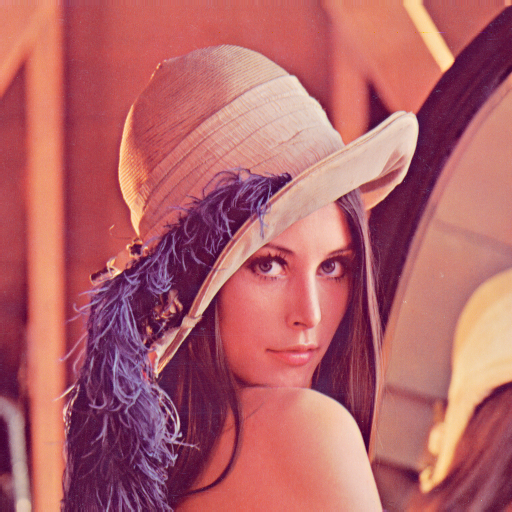

Digital Negative: 


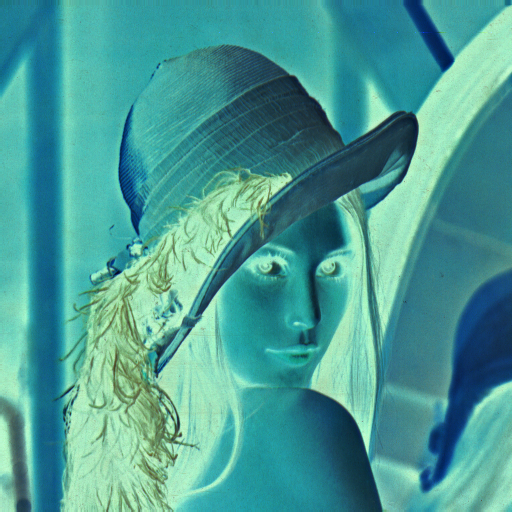

In [ ]:
# Digital Negative

L = img1.max()
img2 = L - img1

print("Image: ")
cv2_imshow(img1)

print("Digital Negative: ")
cv2_imshow(img2)

In [ ]:
# Log Transformation

c = 255 / np.log(1 + np.max(img1))
img2 = c * (np.log(img1 + 1))
   
img2 = np.array(img2, dtype = np.uint8)

print("Image: ")
cv2_imshow(img1)

print("Log Transformation: ")
cv2_imshow(img2)

Image: 


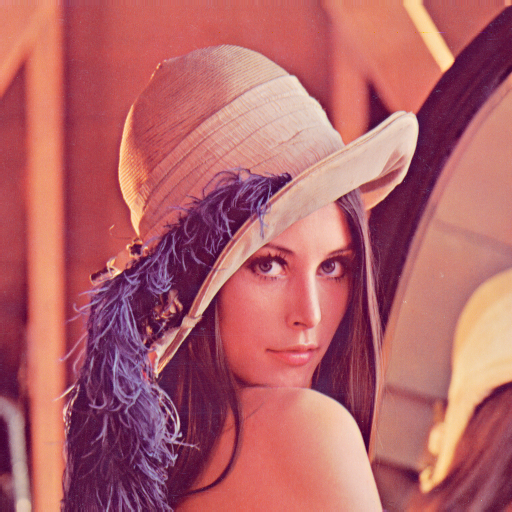

Gamma-factor Transformation: 


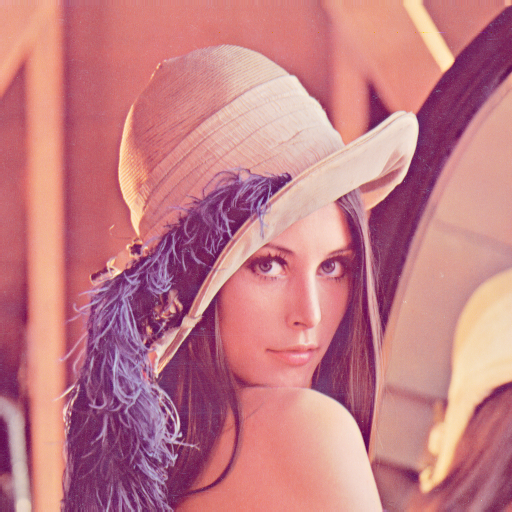

In [ ]:
# Gamma-factor Transformation
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)
   
img2 = gammaCorrection(img1, 1.4)

print("Image: ")
cv2_imshow(img1)

print("Gamma-factor Transformation: ")
cv2_imshow(img2)

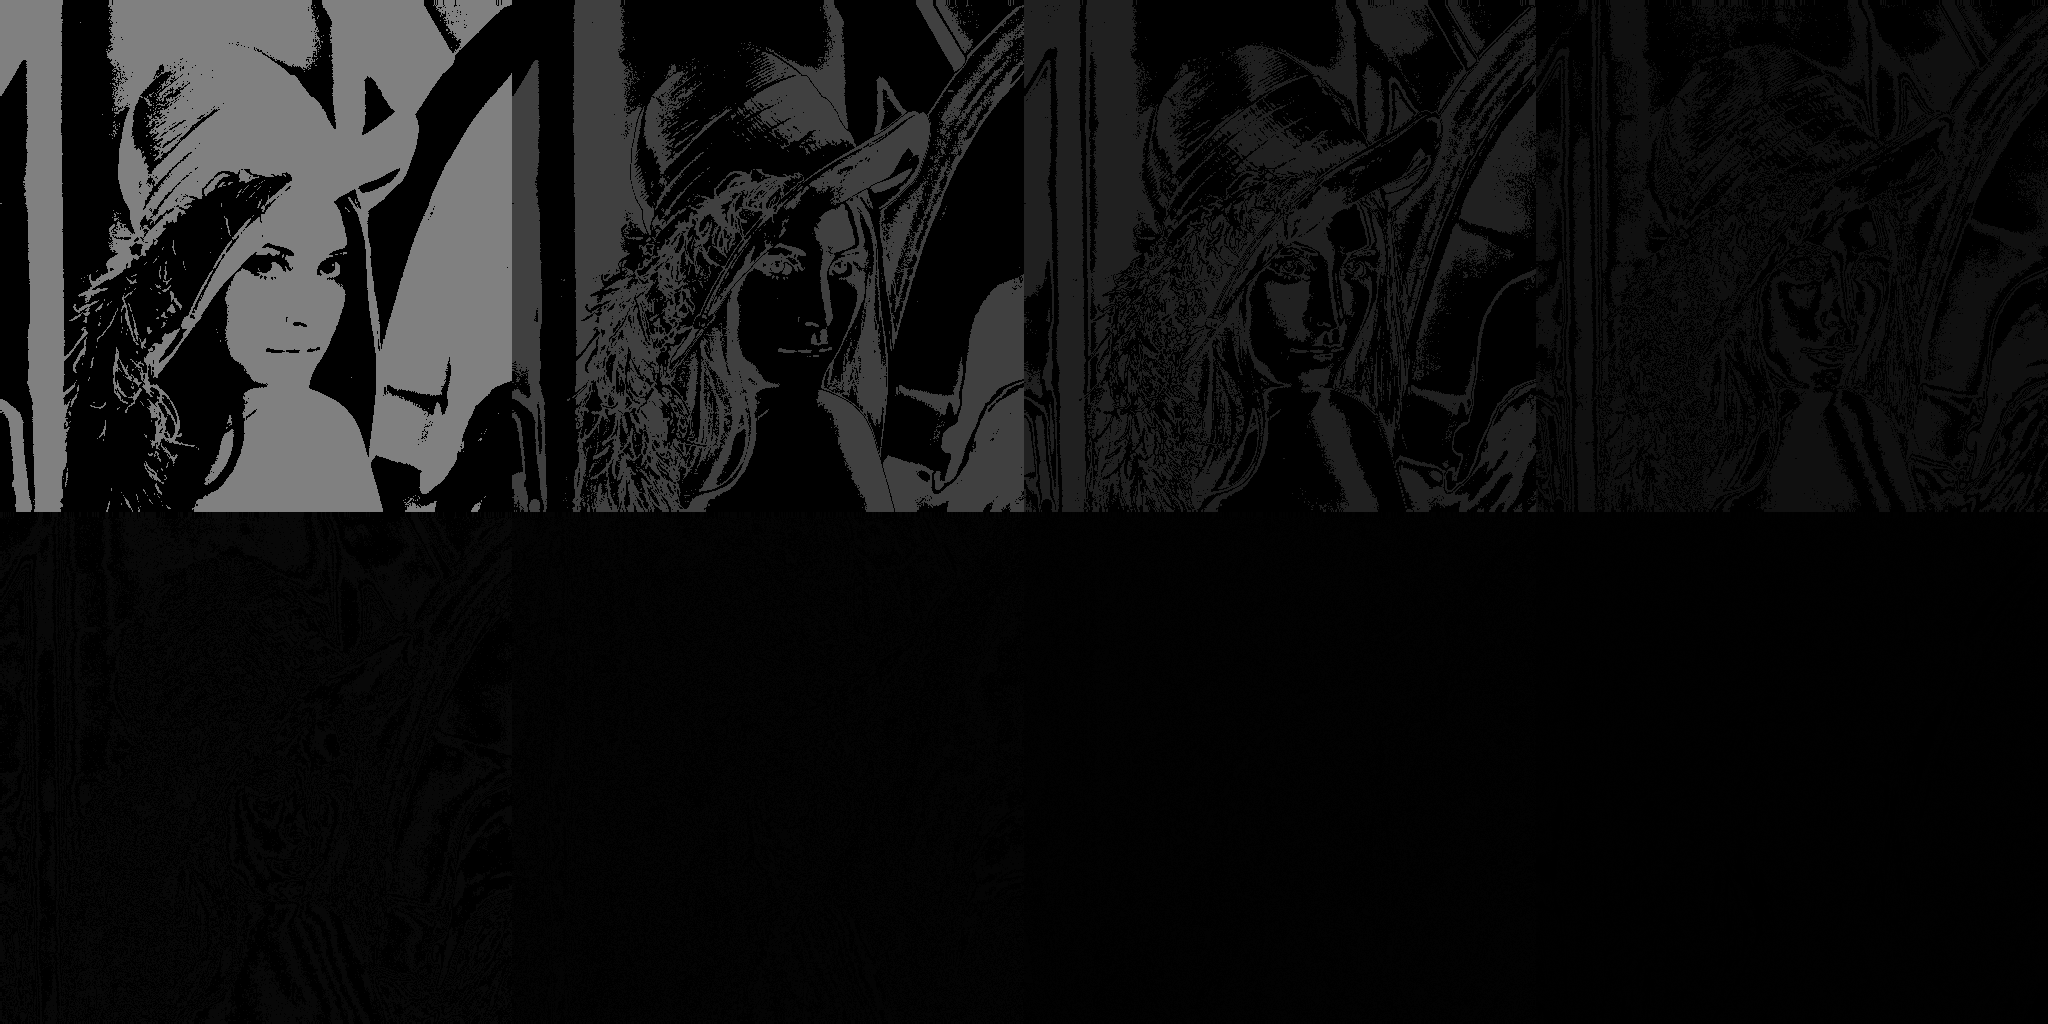

In [ ]:
# Bit Plane and gray level Slicing
img = cv2.imread(folder + "lenna.png",0)

lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
 
# Display the images
cv2_imshow(final)